In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [19]:
df_sm = pd.read_csv('resnet_score_margin1.csv', index_col=0)
df_th = pd.read_csv('resnet_confidence1.csv', index_col=0)

len(df_sm.loc[(df_sm['threshold'] == 0.6) & (df_sm['exit'] == 0) & (df_sm['correct']==0)])/500
df_sm.head()

,threshold,test,exit,sample,exited,prediction,target,correct,score,time
0,0.1,0,0,0,1,0,0,True,0.815302,974.6370
1,0.1,0,1,0,1,0,0,True,0.989887,979.7527
2,0.1,0,2,0,1,0,0,True,0.997743,987.1847
3,0.1,0,3,0,1,0,0,True,0.999999,992.3456
4,0.2,1,0,0,1,0,0,True,0.815302,974.6370


In [20]:
th_num_exited_at_exit = []
th_exit_acc = []
th_exit_acc_if_exited = []
th_false_if_exited = []
th_time = []
th_exit_hist_correct = []
th_exit_hist_false = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    exit_time = []
    exit_hist_correct = []
    exit_hist_false = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==1)])/n_exited)
        exit_n_false.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct']==1)])/500)
        exit_hist_correct.append((len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct'] == True) & (df_th['exited']==1)])))
        exit_hist_false.append((len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct'] == False) & (df_th['exited']==1)])))
    th_num_exited_at_exit.append(exit_n_frac)
    th_exit_acc.append(exit_n_acc)
    th_false_if_exited.append(exit_n_false)
    th_exit_acc_if_exited.append(exit_n_acc_exited)
    th_time.append(exit_time)
    th_exit_hist_correct.append(exit_hist_correct)
    th_exit_hist_false.append(exit_hist_false)
    tmp = df_th.loc[(df_th['exit'] == exit)]
    exit_time.append(tmp['time'])
    #print(exit_n_acc)
    
sm_num_exited_at_exit = []
sm_exit_acc = []
sm_exit_acc_if_exited = []
sm_false_if_exited = []
sm_time = []
sm_exit_hist_correct = []
sm_exit_hist_false = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    exit_hist_correct = []
    exit_hist_false = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1)])
        
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==1)])/n_exited)
        exit_n_false.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct']==1)])/500)
        tmp = df_sm.loc[(df_sm['threshold']== t) & (df_sm['exit'] == exit)]
        exit_time.append(tmp['time'])
        
        exit_hist_correct.append((len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct'] == True) & (df_sm['exited']==1)])))
        exit_hist_false.append((len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct'] == False) & (df_sm['exited']==1)])))
        #print(exit_n_acc)
    sm_num_exited_at_exit.append(exit_n_frac)
    sm_exit_acc.append(exit_n_acc)
    sm_false_if_exited.append(exit_n_false)
    sm_exit_acc_if_exited.append(exit_n_acc_exited)
    sm_time.append(exit_time)
    sm_exit_hist_correct.append(exit_hist_correct)
    sm_exit_hist_false.append(exit_hist_false)

In [21]:
x = np.arange(0.1, 1, 0.1)

## exit accuracy

0.582 0.798 0.962 0.976
0.582 0.798 0.962 0.976


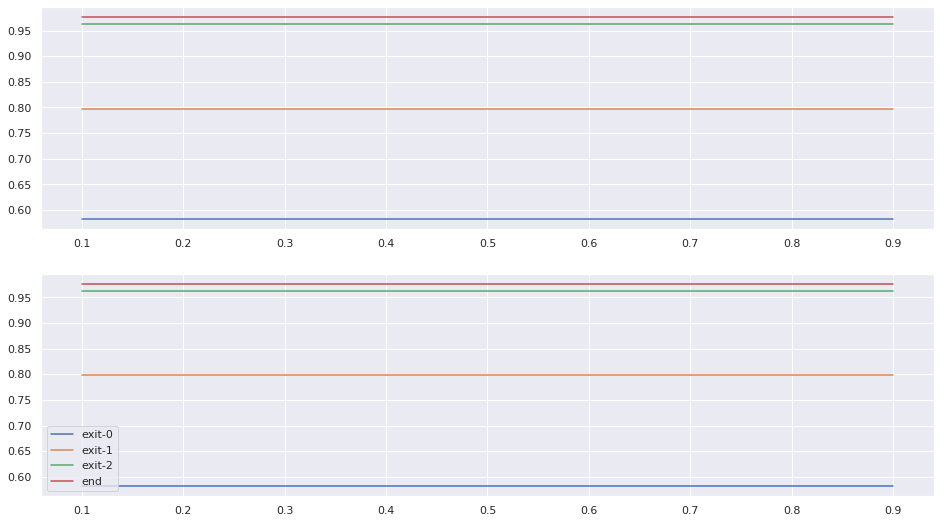

In [22]:
print(th_exit_acc[0][0], th_exit_acc[1][0], th_exit_acc[2][0], th_exit_acc[3][0])
print(sm_exit_acc[0][0], sm_exit_acc[1][0], sm_exit_acc[2][0], sm_exit_acc[3][0])

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_exit_acc:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_exit_acc:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## number of exited by threshold

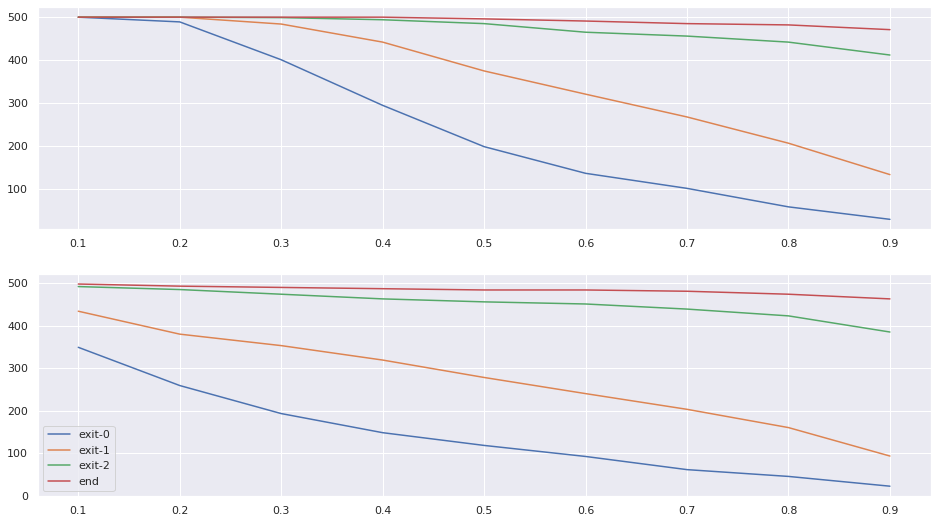

In [23]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_num_exited_at_exit:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_num_exited_at_exit:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## falsely exited

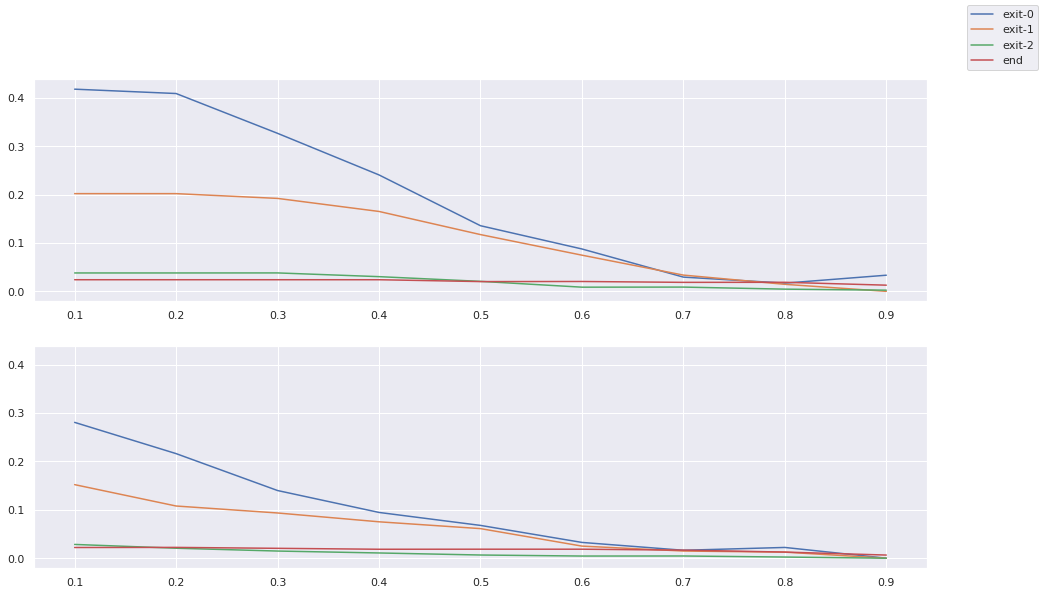

In [24]:

fig, axes = plt.subplots(2, figsize=(16,9), sharey=True)

for data in th_false_if_exited:
    axes[0].plot(x, data)

for data in sm_false_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## accuracy only if exited

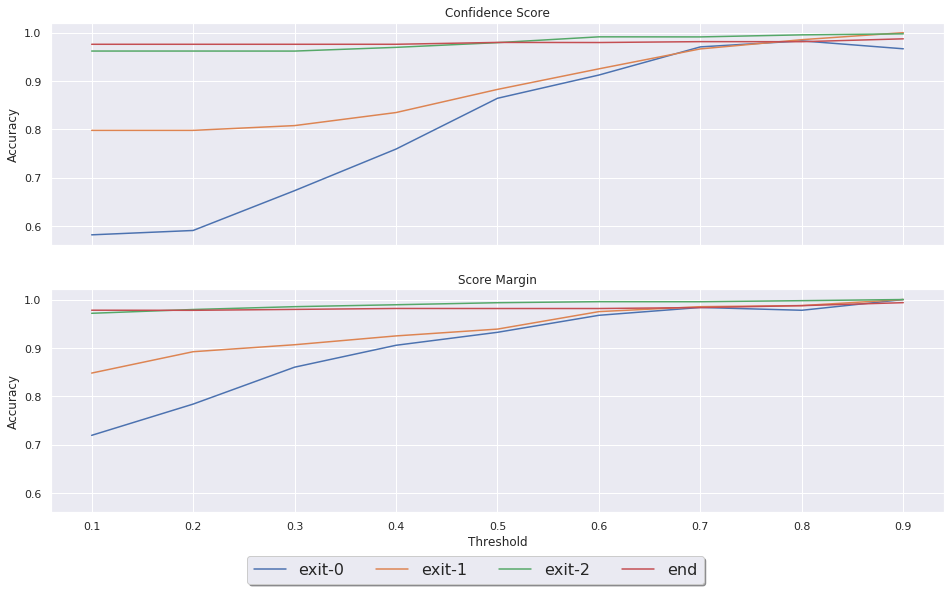

In [25]:

fig, axes = plt.subplots(2, figsize=(16,9), sharey=True)


for data in th_exit_acc_if_exited:
    axes[0].plot(x, data)
axes[0].set_title('Confidence Score')

for data in sm_exit_acc_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
axes[1].set_title('Score Margin')
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'], loc='lower center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=4, fontsize=16)

for ax in axes.flat:
    ax.set(xlabel='Threshold', ylabel='Accuracy')
    ax.label_outer()
plt.show()

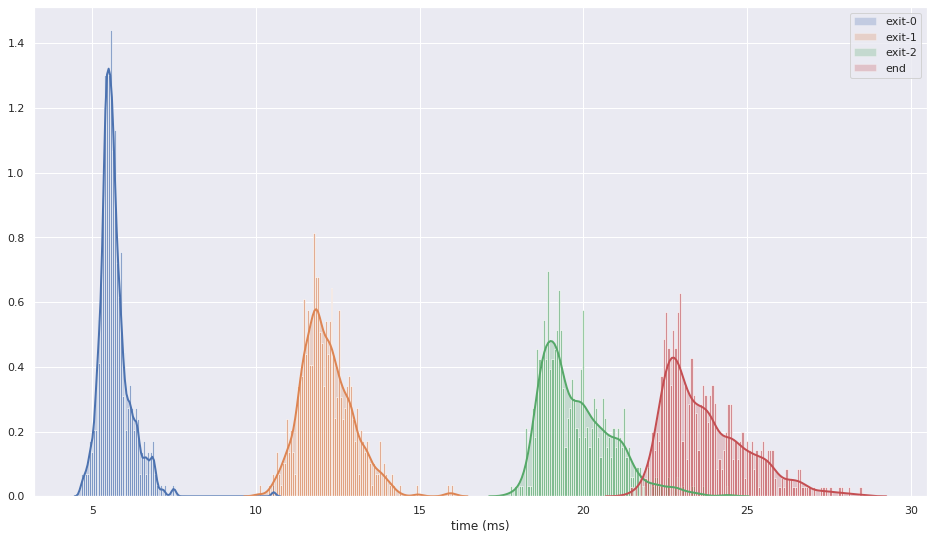

In [26]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
plt.figure(figsize=(16,9))
for exit in range(0,4):
    sns.distplot(th_time[exit][0][35:18001], **kwargs)
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.xlabel('time (ms)')
#plt.xticks(list(range(0,36,1)))
plt.show()

In [27]:
exit_0_time = np.mean(th_time[0][0][35:18001].values)
exit_1_time = np.mean(th_time[1][0][35:18001].values)
exit_2_time = np.mean(th_time[2][0][35:18001].values)
exit_3_time = np.mean(th_time[3][0][35:18001].values)
print(exit_0_time)
print(exit_1_time-exit_0_time)
print(exit_2_time-exit_1_time)
print(exit_3_time-exit_2_time)

5.68508642777149
6.474171153416882
7.6445617021260315
3.932686494961196


In [28]:
print(len(df_sm.loc[(df_sm['exit'] == 1) & (df_sm['correct'] == True) & (df_sm['exited'] == 1)]))
print(len(df_sm.loc[(df_sm['exit'] == 1) & (df_sm['correct'] == False) & (df_sm['exited'] == 1)]))

2268
192


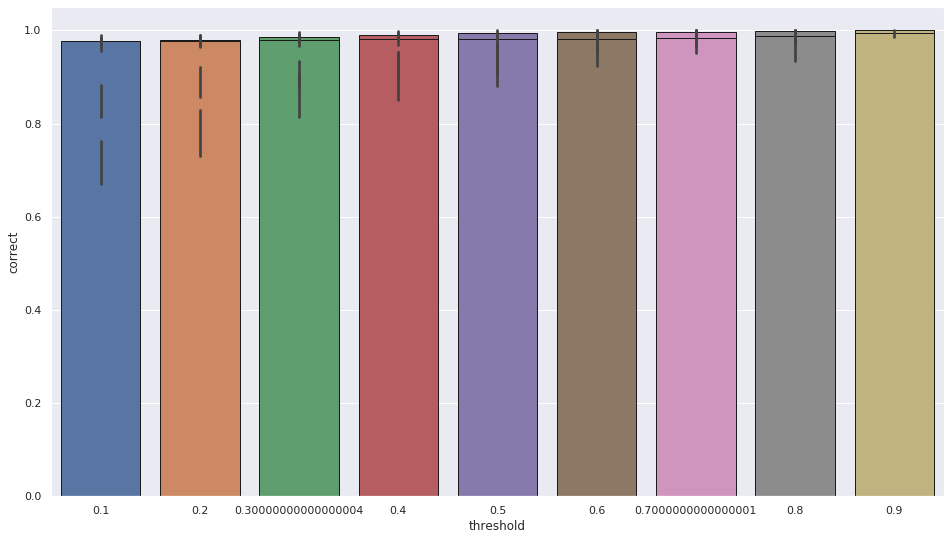

In [29]:
plt.figure(figsize=(16,9))
c = ["blue", "purple", "red", "green", "pink", ]
only_exited = df_sm.loc[(df_sm['exited'] == 1)]
for i, g in enumerate(only_exited.groupby("exit")):
    ax = sns.barplot(data=g[1],
                     x="threshold",
                     y="correct",
                     #hue="exit",
                     #color=c[i],
                     #zorder=-i, # so first bars stay on top
                     edgecolor="k")

In [30]:
exit_hist_correct


[487, 482, 480, 478, 475, 475, 473, 468, 460]

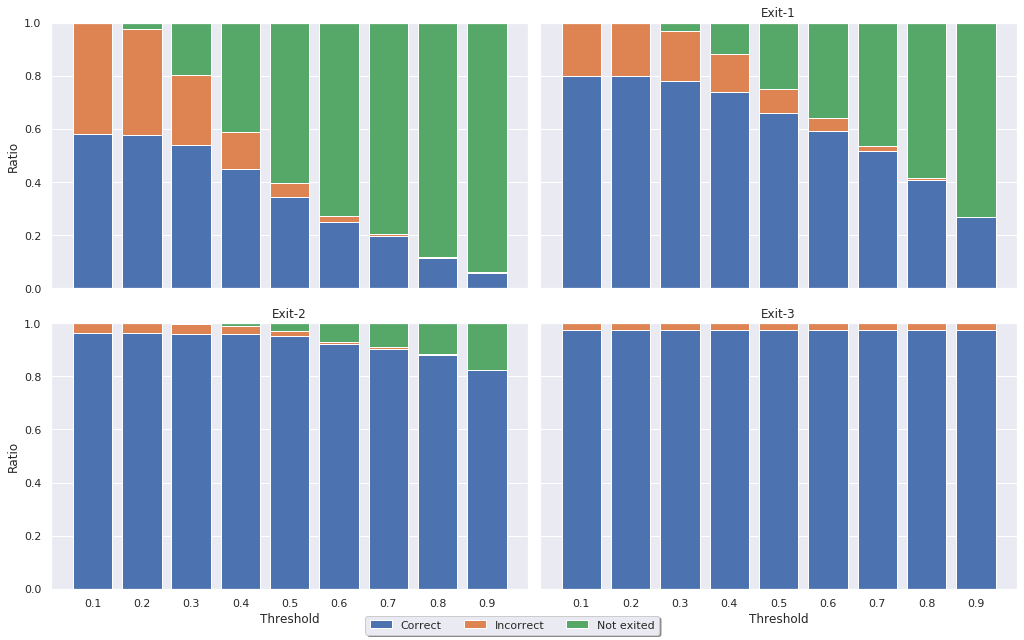

In [71]:
N = np.arange(9)
fig, ax = plt.subplots(2,2, figsize=(16,9), sharex=True, sharey=True)


plt.rcParams.update({'font.size': 12})

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(th_exit_hist_correct)
incorrect = np.array(th_exit_hist_false)

exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_th.loc[(df_th['exit'] == 3) & (df_th['threshold']==i) & (df_th['correct']==True) & (df_th['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_th.loc[(df_sm['exit'] == 3) & (df_th['threshold']==i) & (df_th['correct']==False) & (df_th['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 500
incorrect = incorrect / 500

not_exited = 1- correct - incorrect

ax[0,0].bar(N, correct[0])
ax[0,0].bar(N, incorrect[0], bottom=correct[0])
ax[0,0].bar(N, not_exited[0], bottom=correct[0] + incorrect[0])
#ax[0,0].annotate('Exit-0', xy=(-0.8, 0.5),
                #size='large', ha='right', va='center')

ax[0,1].bar(N, correct[1])
ax[0,1].bar(N, incorrect[1], bottom=correct[1])
ax[0,1].bar(N, not_exited[1], bottom=correct[1] + incorrect[1])
ax[0,1].set_title('Exit-1')

ax[1,0].bar(N, correct[2])
ax[1,0].bar(N, incorrect[2], bottom=correct[2])
ax[1,0].bar(N, not_exited[2], bottom=correct[2] + incorrect[2])
ax[1,0].set_title('Exit-2')

ax[1,1].bar(N, correct[3])
ax[1,1].bar(N, incorrect[3], bottom=correct[3])
ax[1,1].bar(N, not_exited[3], bottom=correct[3] + incorrect[3])
ax[1,1].set_title('Exit-3')



for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()

    # Put a legend below current axis
fig.legend(['Correct', 'Incorrect', 'Not exited'], loc='lower center', fancybox=True, shadow=True, ncol=3)



fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
plt.savefig('threshold_analysis_densenet.png')

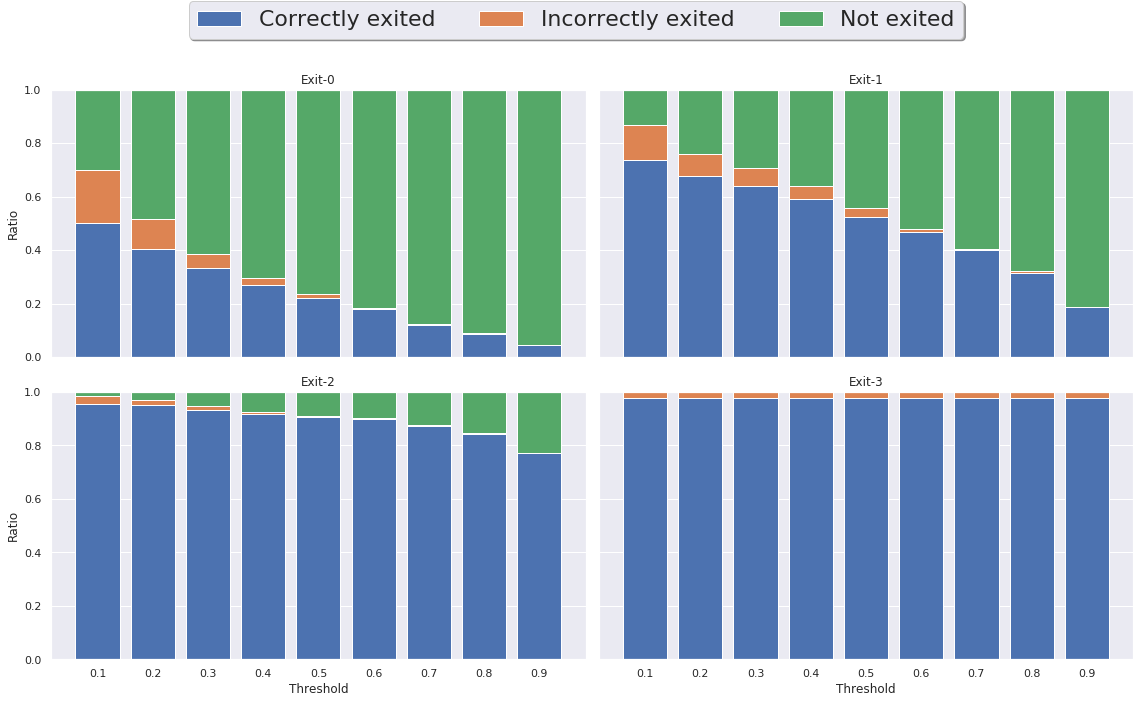

In [32]:
N = np.arange(9)
fig, ax = plt.subplots(2,2, figsize=(16,9), sharex=True, sharey=True)


plt.rcParams.update({'font.size': 12})

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(sm_exit_hist_correct)
incorrect = np.array(sm_exit_hist_false)



exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==True) & (df_sm['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==False) & (df_sm['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 500
incorrect = incorrect / 500

not_exited = 1- correct - incorrect

ax[0,0].bar(N, correct[0])
ax[0,0].bar(N, incorrect[0], bottom=correct[0])
ax[0,0].bar(N, not_exited[0], bottom=correct[0] + incorrect[0])
ax[0,0].set_title('Exit-0')

ax[0,1].bar(N, correct[1])
ax[0,1].bar(N, incorrect[1], bottom=correct[1])
ax[0,1].bar(N, not_exited[1], bottom=correct[1] + incorrect[1])
ax[0,1].set_title('Exit-1')

ax[1,0].bar(N, correct[2])
ax[1,0].bar(N, incorrect[2], bottom=correct[2])
ax[1,0].bar(N, not_exited[2], bottom=correct[2] + incorrect[2])
ax[1,0].set_title('Exit-2')

ax[1,1].bar(N, correct[3])
ax[1,1].bar(N, incorrect[3], bottom=correct[3])
ax[1,1].bar(N, not_exited[3], bottom=correct[3] + incorrect[3])
ax[1,1].set_title('Exit-3')

#ax[0,0].legend(['Correct', 'Incorrect', 'Not exited'])

for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()

    # Put a legend below current axis
fig.legend(['Correctly exited', 'Incorrectly exited', 'Not exited'], loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=3, fontsize=22)

fig.tight_layout()

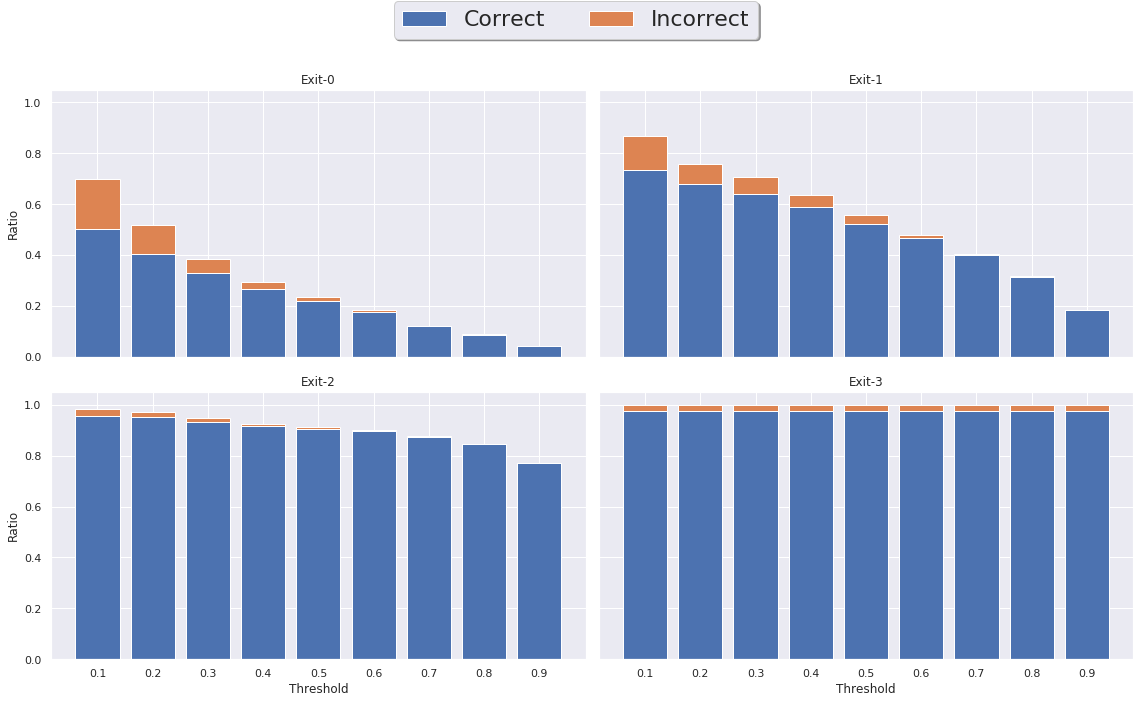

In [33]:
N = np.arange(9)
fig, ax = plt.subplots(2,2, figsize=(16,9), sharex=True, sharey=True)

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(sm_exit_hist_correct)
incorrect = np.array(sm_exit_hist_false)

exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==True) & (df_sm['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==False) & (df_sm['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 500
incorrect = incorrect / 500

ax[0,0].bar(N, correct[0])
ax[0,0].bar(N, incorrect[0], bottom=correct[0])
ax[0,0].set_title('Exit-0')

ax[0,1].bar(N, correct[1])
ax[0,1].bar(N, incorrect[1], bottom=correct[1])
ax[0,1].set_title('Exit-1')

ax[1,0].bar(N, correct[2])
ax[1,0].bar(N, incorrect[2], bottom=correct[2])
ax[1,0].set_title('Exit-2')

ax[1,1].bar(N, correct[3])
ax[1,1].bar(N, incorrect[3], bottom=correct[3])
ax[1,1].set_title('Exit-3')

    # Put a legend below current axis
fig.legend(['Correct', 'Incorrect'], loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=3, fontsize=22)

for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()


fig.tight_layout()

In [34]:
df_sm.loc[(df_sm['exit']==3) & (df_sm['exited']==False) &  (df_sm['correct']==True)]

,threshold,test,exit,sample,exited,prediction,target,correct,score,time
763,0.2,1,3,21,0,0,0,True,0.591490,23.3832
767,0.3,2,3,21,0,0,0,True,0.591490,23.3832
771,0.4,3,3,21,0,0,0,True,0.591490,23.3832
775,0.5,4,3,21,0,0,0,True,0.591490,23.3832
779,0.6,5,3,21,0,0,0,True,0.591490,23.3832
783,0.7,6,3,21,0,0,0,True,0.591490,23.3832
787,0.8,7,3,21,0,0,0,True,0.591490,23.3832
791,0.9,8,3,21,0,0,0,True,0.591490,23.3832
2071,0.5,4,3,57,0,1,1,True,0.000538,23.3032
2075,0.6,5,3,57,0,1,1,True,0.000538,23.3032
